# Japan Used Cars Price Prediction:

**Problem Statement:**

Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

- **This dataset includes 10 features:-**

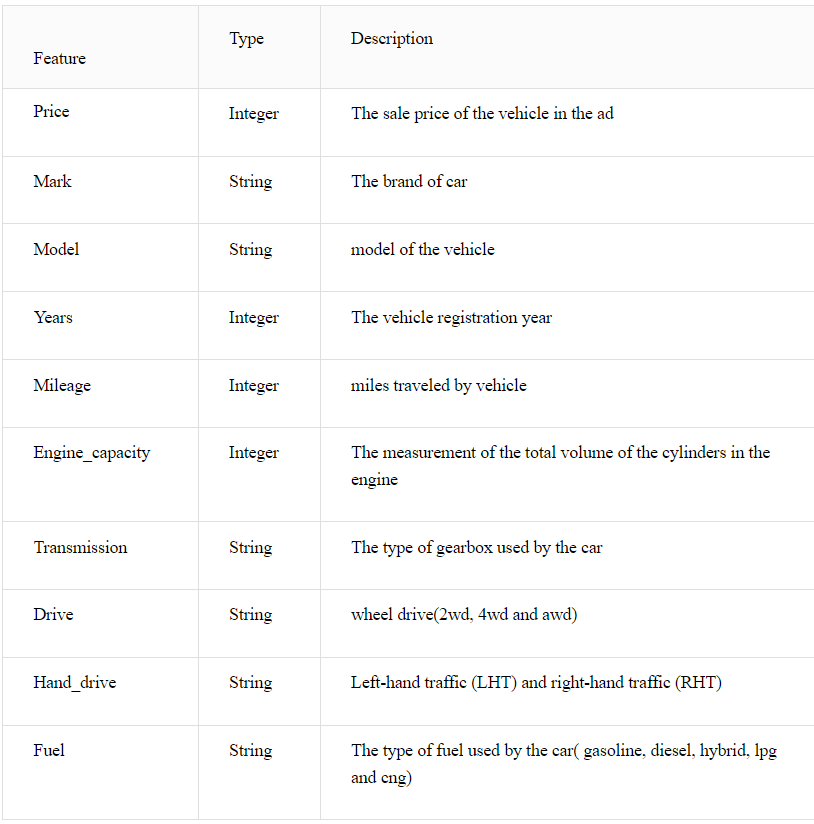

- **Predict the "price (Label)" of an unknown car.**

- Dataset link: https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv")
data.head(10)

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [5]:
# data.shape

print('No. of Rows:', data.shape[0])

print('No. of Columns:', data.shape[1])

No. of Rows: 2318
No. of Columns: 11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


### Data Integrity Check:

Dataset may contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.

In [7]:
data.duplicated().sum() # Checking for duplicacy.

0

In [8]:
# Checking for the presense of whitespaces, '-', 'null', 'NA':

data.isin([' ','?','-','null','NA']).sum().any()

False

In [9]:
# getting NaN Columns data:

miss_val = data.isnull().sum().sort_values(ascending = False)
percent_miss_val =(miss_val/len(data))*100
print(pd.concat([miss_val, percent_miss_val], axis =1, keys =["No. of NaN's", "% NaN data"]))

                 No. of NaN's  % NaN data
id                          0         0.0
price                       0         0.0
mark                        0         0.0
model                       0         0.0
year                        0         0.0
mileage                     0         0.0
engine_capacity             0         0.0
transmission                0         0.0
drive                       0         0.0
hand_drive                  0         0.0
fuel                        0         0.0


In [10]:
data.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

**Observation:**

- No null values present.
- Dataset don't contain any duplicate values, whitespaces,' ','?','-','null','NA'.
- need to drop 'id' column.
- Object data type columns: 'mark', 'model','transmission', 'drive', 'hand_drive', 'fuel'.
- Object data type columns need to be converted to numerical data.

### Data droping & Encoding:

In [11]:
backup = data.copy() # Back up of main file created.

In [12]:
data.drop(['id'], axis=1, inplace=True)

In [13]:
data.nunique()

price               354
mark                 28
model               258
year                 30
mileage            1367
engine_capacity      93
transmission          3
drive                 3
hand_drive            3
fuel                  5
dtype: int64

In [14]:
# Converting columns from string['transmission', 'drive', 'hand_drive', 'fuel'] to numerical values:

In [15]:
data.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [16]:
data['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

In [17]:
# encoding "transmission" Column
data.replace({'transmission':{'at':0,'mt':1,'cvt':2}},inplace=True)

In [18]:
data['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

In [19]:
# encoding "drive" Column
data.replace({'drive':{'2wd':0,'4wd':1,'awd':2}},inplace=True)

In [20]:
data['hand_drive'].unique()

array(['rhd', 'center', 'lhd'], dtype=object)

In [21]:
# encoding "hand_drive" Column
data.replace({'hand_drive':{'rhd':0,'center':1,'1hd':2,'lhd':3}},inplace=True)

In [22]:
data['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [23]:
# encoding "fuel" Column
data['fuel'].replace(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'],[0,1,2,3,4], inplace=True)

In [24]:
# Converting columns from string['mark', 'model'] to numerical values using label encoder: 

In [25]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [26]:
# data['mark'].unique()

In [27]:
# data['mark'].value_counts()

In [28]:
# data['model'].unique()

In [29]:
# data['model'].value_counts()

In [30]:
df1 = data['mark'] 
df1 = df1.T
#df1

In [31]:
df2 = data['model'] 
df2 = df2.T
#df2

In [32]:
df_le1 = lab_enc.fit_transform(df1)
df_le2 = lab_enc.fit_transform(df2)

In [33]:
data['mark'] = df_le1
data['model'] = df_le2

In [34]:
data.sample(7)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1966,1300,4,121,1994,50200,660,1,1,0,0
2257,1381,25,130,2005,127897,1300,0,0,0,0
1987,1306,25,205,2005,101000,1490,0,0,0,0
72,390,19,170,2011,96300,1500,0,0,0,0
2029,1306,15,238,2007,69819,1500,0,0,0,0
1694,1204,8,142,2004,111000,660,0,0,0,0
81,390,19,79,2011,115000,1500,0,0,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            2318 non-null   int64
 1   mark             2318 non-null   int32
 2   model            2318 non-null   int32
 3   year             2318 non-null   int64
 4   mileage          2318 non-null   int64
 5   engine_capacity  2318 non-null   int64
 6   transmission     2318 non-null   int64
 7   drive            2318 non-null   int64
 8   hand_drive       2318 non-null   int64
 9   fuel             2318 non-null   int64
dtypes: int32(2), int64(8)
memory usage: 163.1 KB


In [36]:
data.describe()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,19.411993,147.894305,2005.972390,100013.194996,1507.010785,0.076359,0.087144,0.021139,0.020276
std,288.673112,7.132919,68.563361,3.698863,52512.478883,549.585170,0.310571,0.289655,0.249267,0.211910
min,80.000000,0.000000,0.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,15.000000,104.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,24.000000,146.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,0.000000,0.000000
75%,1213.000000,25.000000,204.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,0.000000,0.000000
max,1400.000000,27.000000,257.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,3.000000,4.000000


### Data Visualization:

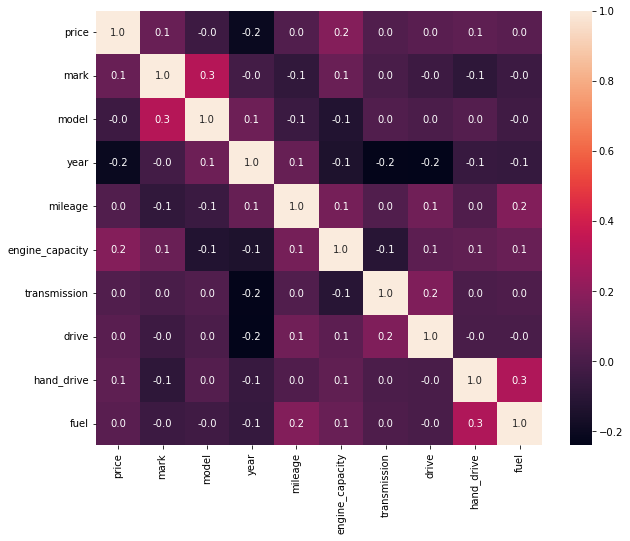

In [37]:
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True,fmt='0.1f')
plt.show()

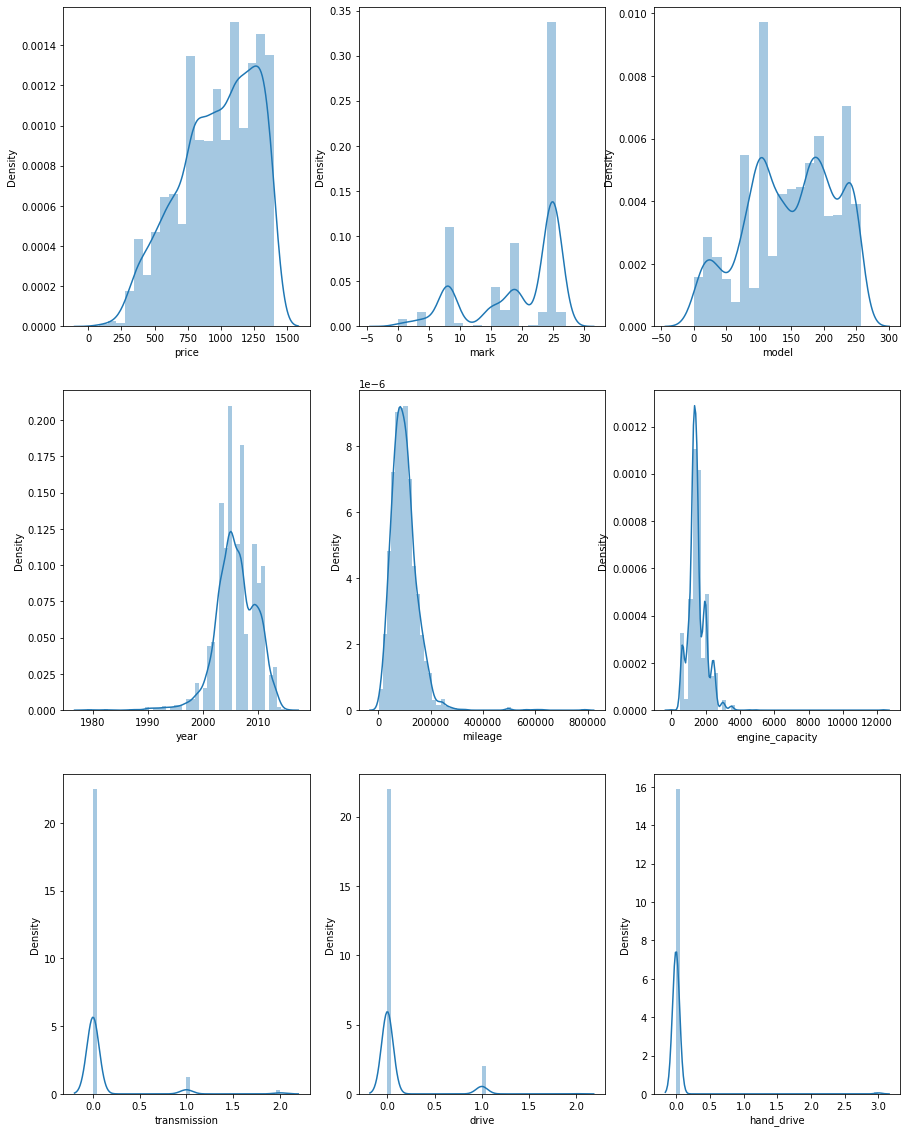

In [38]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber =1
for column in data:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### Splitting feature & Label data: 

In [39]:
data.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [40]:
X = data.drop(['price'],axis=1) # Storing Feature matrix in X.
y = data['price'] # # Storing label(response oe Target) in vector y.

### Train-Test Split:

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

In [48]:
# Import the models:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
# Model training:

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.05704312927305333

In [51]:
svm = SVR()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

-0.02878141226663855

In [54]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

-0.31479322478150285

In [55]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.26961844216126396

In [56]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
gr.score(X_test,y_test)

0.24017922250120416

In [57]:
# Prediction on Test Data:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)
y_pred5 = dt.predict(X_test)

In [58]:
# comparing Actual & Predicted Values:
df_scores = pd.DataFrame({'Actual':y_test, 'Linear_Reg':y_pred1,
                    'SVR':y_pred2 ,'RF_Reg':y_pred3,
                    'GB_Reg':y_pred4,'DT_Reg':y_pred5})
df_scores

,Actual,Linear_Reg,SVR,RF_Reg,GB_Reg,DT_Reg
1040,950,881.407514,1009.886995,830.69,854.465361,1100.0
548,760,942.571788,1009.702336,794.44,909.425744,660.0
100,400,773.597296,997.506021,645.44,835.341933,1350.0
1044,950,1173.076446,1009.814386,1107.22,1018.470284,1400.0
251,560,955.611366,1009.844367,1046.88,1007.321146,1120.0
...,...,...,...,...,...,...
707,821,893.589320,1009.012180,1112.70,1063.368295,1220.0
2216,1373,981.339581,1006.979668,1122.35,1081.492222,850.0
1491,1123,1005.262265,1009.663057,744.46,880.080421,588.0
1523,1130,937.414272,1009.076257,849.85,967.129134,800.0


### Comparative analysis among the algorithms for this project

- Five machine learning algorithms have been tried and checked. Clearly, based on the df_score of each of the models. The Best Fitted Model is: **Linear_Regression model.**

### Creating the model using Linear_Regression model:

In [60]:
import joblib
joblib.dump(lr,'final_LR_2nd_Car_model.pkl')

['final_LR_2nd_Car_model.pkl']